In [34]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import gensim

In [93]:
import sys
sys.path.insert(0,'C:/Users/cvikas10/Documents/Python Programs')

from nlp_modules import *

pd.options.mode.chained_assignment = None
path = 'C:/Users/cvikas10/Desktop/New folder'

df_ = pd.read_csv(os.path.join(path,'new_scores_ppm.csv'),
                  converters={'id':str,
                              'tin':str,
                              'npi':str,
                              'medicare_flag':str,
                              'cands_flag':str,
                              'fqhc_flag':str,
                              'sat2':str,
                              'sat1_oe':str,
                              'cleaned':str,
                              'bagofwords':str,
                              'polarity_compound':float,
                              'polarity_positive':float,
                              'polarity_negative':float,
                              'polarity_neutral':float,
                              'subjectivity':float,
                              'rptqtr':str,
                              'region':str,
                              'healthplan':str})

df_ = df_[df_['sat2']!='']
df_.reset_index(drop=True,inplace=True)
parent_df = df_

In [94]:
df_.shape

(4941, 22)

In [95]:
df_.dtypes

id                    object
tin                   object
npi                   object
medicare_flag         object
cands_flag            object
fqhc_flag             object
sat2                  object
sat1_oe               object
comment_length         int64
word_count             int64
avg_word_length      float64
cleaned               object
bagofwords            object
polarity              object
polarity_compound    float64
polarity_positive    float64
polarity_negative    float64
polarity_neutral     float64
subjectivity         float64
rptqtr                object
region                object
healthplan            object
dtype: object

In [96]:
df_['sat2'].value_counts()

8     847
10    682
7     634
5     608
9     561
6     401
0     285
3     255
2     243
4     228
1     197
Name: sat2, dtype: int64

In [89]:
df_[df_['sat2'].isnull()]

,medicare_flag,cands_flag,fqhc_flag,sat2,sat1_oe,comment_length,word_count,avg_word_length,cleaned,bagofwords,polarity,polarity_compound,polarity_positive,polarity_negative,polarity_neutral,subjectivity,rptqtr,region,healthplan
1309,NaN,1,0,NaN,It is easy to communicate with the insurance c...,193,26,6.461538,it is easy to communicate with the insurance c...,easy communicate insurance company unitedhealt...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.6969,0.200,0.000,0.800,0.370833,201701,Northeast,UnitedHealthcare of PA/WV
1814,1,1,0,NaN,All patients are welcome for care.,34,6,4.833333,all patients are welcome for care,patients welcome care,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.7351,0.608,0.000,0.392,0.900000,201702,Southeast,"UnitedHealthcare of Florida, Inc. - North Florida"
2606,0,0,0,NaN,"Reimbursement is low, online referral system i...",271,50,4.440000,reimbursement is low online referral system is...,reimbursement low online referral system user ...,"{'neg': 0.171, 'neu': 0.795, 'pos': 0.034, 'co...",-0.7374,0.034,0.171,0.795,0.467778,201703,Southeast,"UnitedHealthcare of North Carolina, Inc."
4415,1,0,0,NaN,UHC IS THE POOREST PAYOR THAT WE ARE CONTRACTE...,53,10,4.400000,uhc is the poorest payor that we are contracte...,uhc poorest payor contracted,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",-0.5423,0.000,0.280,0.720,0.000000,201802,Southeast,"UnitedHealthcare of North Carolina, Inc."


In [97]:
parent_df = parent_df[parent_df['sat2'].notnull()]
parent_df['sat2'] = parent_df['sat2'].astype(int)
detract_df = parent_df[parent_df['sat2']<7]
promo_df = parent_df[parent_df['sat2']>=7]

print (detract_df.shape)
print (promo_df.shape)

(2217, 22)
(2724, 22)


In [98]:
parent_df.columns

Index(['id', 'tin', 'npi', 'medicare_flag', 'cands_flag', 'fqhc_flag', 'sat2',
       'sat1_oe', 'comment_length', 'word_count', 'avg_word_length', 'cleaned',
       'bagofwords', 'polarity', 'polarity_compound', 'polarity_positive',
       'polarity_negative', 'polarity_neutral', 'subjectivity', 'rptqtr',
       'region', 'healthplan'],
      dtype='object')

In [49]:
parent_df['tin'].head(10)

0    363132612
1    650457414
2    841367175
3    426004813
4    593575383
5    381459362
6    752544522
7    870703522
8    474445431
9    223679948
Name: tin, dtype: object

In [99]:
#common words removal
#selecting only 5 because if it is more than 10 then the token reimbursement will be lost
freq5 = pd.Series(' '.join(parent_df['bagofwords']).split()).value_counts()[:5]
print (freq5)

patients            1694
uhc                 1276
insurance            688
new                  634
unitedhealthcare     574
dtype: int64


In [100]:
freq5 = freq5.loc[['uhc','insurance','unitedhealthcare'],]
freq5

uhc                 1276
insurance            688
unitedhealthcare     574
dtype: int64

In [101]:
freq5 = list(freq5.index)
parent_df['bagofwords'] = parent_df['bagofwords'].apply(lambda x: " ".join(x for x in x.split() if x not in freq5))

In [8]:
parent_df['bagofwords'].head(10)

0                          always welcome new patients
1    intrusive requirements inability use lab patie...
2    want schedules full openings would soon see fi...
3                                     neutral feelings
4    currently accepting new patients continue see ...
5              billing authorizations consume lot time
6             would depend choices would hope insurers
7    huge issue new infertility pa process subseque...
8    1 difficult speak live person collectively aut...
9    noticed poor claim processing maternity claims...
Name: bagofwords, dtype: object

In [9]:
df = parent_df

In [10]:
#Segmenting the complete data frame based on the quarter
df_q1 = df[df['rptqtr']=='201603']
df_q2 = df[df['rptqtr']=='201604']
df_q3 = df[df['rptqtr']=='201701']
df_q4 = df[df['rptqtr']=='201702']
df_q5 = df[df['rptqtr']=='201703']
df_q6 = df[df['rptqtr']=='201704']
df_q7 = df[df['rptqtr']=='201801']
df_q8 = df[df['rptqtr']=='201802']
df_q9 = df[df['rptqtr']=='201803']

df_q1['sat2']=df_q1['sat2'].astype(int)
df_q2['sat2']=df_q2['sat2'].astype(int)
df_q3['sat2']=df_q3['sat2'].astype(int)
df_q4['sat2']=df_q4['sat2'].astype(int)
df_q5['sat2']=df_q5['sat2'].astype(int)
df_q6['sat2']=df_q6['sat2'].astype(int)
df_q7['sat2']=df_q7['sat2'].astype(int)
df_q8['sat2']=df_q8['sat2'].astype(int)
df_q9['sat2']=df_q9['sat2'].astype(int)

print (df_q1.shape)
print (df_q2.shape)
print (df_q3.shape)
print (df_q4.shape)
print (df_q5.shape)
print (df_q6.shape)
print (df_q7.shape)
print (df_q8.shape)
print (df_q9.shape)

(229, 16)
(568, 16)
(587, 16)
(718, 16)
(627, 16)
(650, 16)
(530, 16)
(529, 16)
(503, 16)


In [11]:
#Topic modelling

#First tokenizing the data sentence wise and then after that word wise to avoid missing characters like punctuation
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(str(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [12]:
    word_list = tokenize_only(df_q1['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(X).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(X))
    print("Perplexity using tf-idf: ", lda.perplexity(X))

Sparsity:  0.0927643784786642 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
claims        work          patients      like          new           
see           customer      claim         payment       issues        
difficult     would         one           providers     poor          
plans         medicare      website       practice      always        
good          company       authorizationsgetting       pay           
different     representativesprocess       year          coverage      
never         issue         denials       rather        want          
people        information   higher        lowest        processing    
relations     representativetimes         payers        number        
however       welcome       services      payments      due           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [13]:
pyLDAvis.sklearn.prepare(lda,_X_,count_vect,mds='mmds')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.270429  0.167088       1        1  10.925926
4      0.072792  0.283727       2        1  10.555556
0     -0.238703 -0.187843       3        1  10.296296
1     -0.176252  0.256323       4        1  10.092593
9      0.112557 -0.281440       5        1   9.851852
6     -0.083317  0.094924       6        1   9.777778
3     -0.058308 -0.226471       7        1   9.759259
5     -0.287130  0.016508       8        1   9.722222
8      0.114664 -0.042882       9        1   9.611111
7      0.273269 -0.079935      10        1   9.407407, topic_info=     Category       Freq           Term      Total  loglift  logprob
term                                                                
684   Default  48.000000       patients  48.000000  30.0000  30.0000
166   Default  34.000000         claims  34.000000  29.0000  29.0000
399   Default  23.000000            get  23.000000  28.0000  28.0000
1068  Default  21.000000           work  21.000000  27.0000  27.0000
902   Default  20.000000        service  20.000000  26.0000  26.0000
1032  Default  19.000000             us  19.000000  25.0000  25.0000
893   Default  19.000000            see  19.000000  24.0000  24.0000
982   Default  17.000000           time  17.000000  23.0000  23.0000
280   Default  16.000000      difficult  16.000000  22.0000  22.0000
240   Default  16.000000       customer  16.000000  21.0000  21.0000
1073  Default  16.000000          would  16.000000  20.0000  20.0000
777   Default  15.000000       provider  15.000000  19.0000  19.0000
310   Default  15.000000           easy  15.000000  18.0000  18.0000
627   Default  14.000000            new  14.000000  17.0000  17.0000
535   Default  13.000000           like  13.000000  16.0000  16.0000
692   Default  13.000000        payment  13.000000  15.0000  15.0000
136   Default  12.000000           care  12.000000  14.0000  14.0000
588   Default  12.000000       medicare  12.000000  13.0000  13.0000
683   Default  12.000000        patient  12.000000  12.0000  12.0000
494   Default  12.000000         issues  12.000000  11.0000  11.0000
577   Default  11.000000           many  11.000000  10.0000  10.0000
165   Default  11.000000          claim  11.000000   9.0000   9.0000
832   Default  10.000000  reimbursement  10.000000   8.0000   8.0000
724   Default  10.000000          plans  10.000000   7.0000   7.0000
778   Default  10.000000      providers  10.000000   6.0000   6.0000
740   Default  10.000000       practice  10.000000   5.0000   5.0000
761   Default  10.000000       problems  10.000000   4.0000   4.0000
757   Default  10.000000          prior  10.000000   3.0000   3.0000
653   Default  10.000000            one  10.000000   2.0000   2.0000
42    Default   9.000000         always   9.000000   1.0000   1.0000
...       ...        ...            ...        ...      ...      ...
281   Topic10   2.277039     difficulty   2.919080   2.1153  -4.7145
958   Topic10   2.277039         system   2.919080   2.1153  -4.7145
366   Topic10   2.277039           feel   2.919080   2.1153  -4.7145
894   Topic10   2.277039         seeing   2.919080   2.1153  -4.7145
75    Topic10   2.277039         asthma   2.919080   2.1153  -4.7145
462   Topic10   2.277039     impossible   2.919080   2.1153  -4.7145
730   Topic10   1.542510       policies   2.184551   2.0157  -5.1039
915   Topic10   1.542510        slowest   2.184551   2.0157  -5.1039
975   Topic10   1.542510      therefore   2.184551   2.0157  -5.1039
721   Topic10   1.542510          place   2.184551   2.0157  -5.1039
652   Topic10   1.542510            old   2.184551   2.0157  -5.1039
463   Topic10   1.542510        improve   2.184551   2.0157  -5.1039
41    Topic10   1.542510         allows   2.184551   2.0157  -5.1039
336   Topic10   1.542510           ever   2.184551   2.0157  -5.1039
969   Topic10   1.542510       tenncare   2.184551   2.0157  -5.10

In [14]:
detract_df = parent_df[parent_df['sat2']<7]
promo_df = parent_df[parent_df['sat2']>=7]

In [15]:
    word_list = tokenize_only(detract_df['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(X).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(X))
    print("Perplexity using tf-idf: ", lda.perplexity(X))

Sparsity:  0.02845658652885036 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
issues        new           get           poor          difficult     
work          time          patient       process       service       
many          provider      company       one           getting       
low           practice      good          would         us            
paid          like          lower         plans         much          
authorizationsservices      accept        call          healthcare    
network       denied        issue         referrals     due           
deal          information   long          records       surgery       
providers     optum         worst         physician     times         
representativescommercial    approved      understand    representative


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------     

In [16]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect,mds='mmds')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.337937  0.226146       1        1  11.000080
1      0.098524  0.373041       2        1  10.397670
5     -0.306049 -0.225256       3        1  10.339631
4     -0.221356  0.352600       4        1  10.273586
7      0.164692 -0.379373       5        1  10.101469
8     -0.130289  0.129508       6        1   9.865308
9     -0.091796 -0.337980       7        1   9.829284
3     -0.396547  0.023626       8        1   9.541088
6      0.159080 -0.077242       9        1   9.497058
2      0.385804 -0.085071      10        1   9.154825, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
2191  Default  637.000000       patients  637.000000  30.0000  30.0000
503   Default  336.000000         claims  336.000000  29.0000  29.0000
1278  Default  291.000000            get  291.000000  28.0000  28.0000
860   Default  261.000000      difficult  261.000000  27.0000  27.0000
2582  Default  247.000000  reimbursement  247.000000  26.0000  26.0000
1969  Default  187.000000            new  187.000000  25.0000  25.0000
3149  Default  181.000000           time  181.000000  24.0000  24.0000
2190  Default  162.000000        patient  162.000000  23.0000  23.0000
418   Default  155.000000           care  155.000000  22.0000  22.0000
2293  Default  144.000000           poor  144.000000  21.0000  21.0000
501   Default  136.000000          claim  136.000000  20.0000  20.0000
2379  Default  135.000000          prior  135.000000  19.0000  19.0000
1617  Default  138.000000         issues  138.000000  18.0000  18.0000
2803  Default  132.000000            see  132.000000  17.0000  17.0000
2831  Default  131.000000        service  131.000000  16.0000  16.0000
261   Default  127.000000  authorization  127.000000  15.0000  15.0000
3476  Default  130.000000           work  130.000000  14.0000  14.0000
2435  Default  126.000000       provider  126.000000  13.0000  13.0000
2394  Default  118.000000        process  118.000000  12.0000  12.0000
1806  Default  119.000000           many  119.000000  11.0000  11.0000
2193  Default  111.000000            pay  111.000000  10.0000  10.0000
148   Default  106.000000         always  106.000000   9.0000   9.0000
2062  Default  105.000000            one  105.000000   8.0000   8.0000
1767  Default  112.000000            low  112.000000   7.0000   7.0000
2200  Default  106.000000        payment  106.000000   6.0000   6.0000
2319  Default  107.000000       practice  107.000000   5.0000   5.0000
3486  Default  102.000000          would  102.000000   4.0000   4.0000
1280  Default  104.000000        getting  104.000000   3.0000   3.0000
2145  Default  106.000000           paid  106.000000   2.0000   2.0000
3289  Default  102.000000         united  102.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
1300  Topic10   66.994753           good   67.780238   2.3792  -3.5304
1768  Topic10   52.860839          lower   53.646324   2.3761  -3.7674
29    Topic10   50.034056         accept   50.819541   2.3753  -3.8224
1615  Topic10   47.207273          issue   47.992759   2.3744  -3.8805
1749  Topic10   44.380491           long   45.165976   2.3733  -3.9423
3483  Topic10   31.188837          worst   31.974322   2.3660  -4.2950
200   Topic10   30.246576       approved   31.032061   2.3653  -4.3257
2229  Topic10   29.304315         people   30.089800   2.3644  -4.3573
1169  Topic10   22.708489           feel   23.493974   2.3569  -4.6123
2804  Topic10   22.708489         seeing   23.493974   2.3569  -4.6123
3207  Topic10   21.766228      treatment   22.551713   2.3554  -4.6547
259   Topic10   20.823967           auth   21.609452   2.3539  -4.6990
2651  Topic10   20.823967           reps   21.609452   2.3539  -4.6990
1719  Topic10   17.997184        limited   

In [107]:
    word_list = tokenize_only(parent_df['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(X).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(X))
    print("Perplexity using tf-idf: ", lda.perplexity(X))

Sparsity:  0.02353488382939619 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
care          provider      new           work          claims        
issues        paid          patient       difficult     authorization 
process       pay           always        see           need          
medicare      company       healthcare    service       low           
services      accept        deal          prior         referrals     
better        providers     us            problems      companies     
lower         help          staff         website       schedule      
issue         commercial    area          much          take          
use           working       rate          lot           physician     
never         experience    often         needed        open          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [108]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect, mds = 'mmds')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.372555  0.234220       1        1  12.221971
8      0.109415  0.386767       2        1  10.478408
3     -0.301183 -0.227013       3        1  10.210442
4     -0.225285  0.377836       4        1  10.019889
2      0.180334 -0.385471       5        1   9.921039
0     -0.162012  0.144196       6        1   9.875783
6     -0.099141 -0.379198       7        1   9.755496
1     -0.419820  0.010408       8        1   9.372008
7      0.148289 -0.050764       9        1   9.257676
9      0.396847 -0.110982      10        1   8.887288, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
2633  Default  1340.000000       patients  1340.000000  30.0000  30.0000
2373  Default   580.000000            new   580.000000  29.0000  29.0000
617   Default   511.000000         claims   511.000000  28.0000  28.0000
1574  Default   412.000000           good   412.000000  27.0000  27.0000
4199  Default   379.000000           work   379.000000  26.0000  26.0000
3105  Default   362.000000  reimbursement   362.000000  25.0000  25.0000
517   Default   327.000000           care   327.000000  24.0000  24.0000
2632  Default   328.000000        patient   328.000000  23.0000  23.0000
2784  Default   316.000000       practice   316.000000  22.0000  22.0000
1044  Default   314.000000      difficult   314.000000  21.0000  21.0000
188   Default   302.000000         always   302.000000  20.0000  20.0000
1169  Default   326.000000           easy   326.000000  19.0000  19.0000
2062  Default   291.000000           like   291.000000  18.0000  18.0000
3374  Default   291.000000            see   291.000000  17.0000  17.0000
1547  Default   315.000000            get   315.000000  16.0000  16.0000
3801  Default   283.000000           time   283.000000  15.0000  15.0000
4213  Default   269.000000          would   269.000000  14.0000  14.0000
1951  Default   255.000000         issues   255.000000  13.0000  13.0000
3965  Default   244.000000         united   244.000000  12.0000  12.0000
3409  Default   236.000000        service   236.000000  11.0000  11.0000
2927  Default   206.000000       provider   206.000000  10.0000  10.0000
2170  Default   214.000000           many   214.000000   9.0000   9.0000
2859  Default   202.000000          prior   202.000000   8.0000   8.0000
322   Default   192.000000  authorization   192.000000   7.0000   7.0000
2877  Default   183.000000        process   183.000000   6.0000   6.0000
615   Default   184.000000          claim   184.000000   5.0000   5.0000
1549  Default   173.000000        getting   173.000000   4.0000   4.0000
2580  Default   171.000000           paid   171.000000   3.0000   3.0000
2645  Default   179.000000        payment   179.000000   2.0000   2.0000
1650  Default   173.000000     healthcare   173.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
1574  Topic10   411.773792           good   412.589494   2.4186  -2.2040
2646  Topic10   146.765849       payments   147.581551   2.4150  -3.2356
2366  Topic10   142.719926        network   143.535629   2.4148  -3.2636
4158  Topic10   130.582158           well   131.397860   2.4143  -3.3525
4119  Topic10   113.386986           want   114.202688   2.4134  -3.4937
1585  Topic10   101.249218          great   102.064920   2.4125  -3.6069
2880  Topic10    88.099969     processing    88.915671   2.4113  -3.7460
1295  Topic10    85.065527           even    85.881229   2.4110  -3.7810
3942  Topic10    69.893316     understand    70.709018   2.4089  -3.9775
2641  Topic10    56.744067          payer    57.559769   2.4063  -4.1859
527   Topic10    47.640741       carriers    48.456443   2.4036  -4.3608
1299  Topic10    47.640741          every    48.456443   2.4036  -4.3608
1566  Topic10    46.6292

In [65]:
    word_list = tokenize_only(df_q2['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(X).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(X))
    print("Perplexity using tf-idf: ", lda.perplexity(X))

Sparsity:  0.06080841572652354 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
patient       many          care          time          good          
would         paid          practice      reimbursement easy          
us            deal          like          claim         one           
medicare      health        plans         prior         pay           
understand    optum         authorization office        referrals     
company       less          payment       accept        reimbursements
seems         information   process       united        area          
problems      lower         issue         lot           commercial    
problem       excellent     online        physician     know          
referral      trying        procedures    network       physicians    


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [106]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect,mds='tsne')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      160.728760   46.555695       1        1  10.954778
2      -29.912666  125.288963       2        1  10.412730
7       44.027504   34.160313       3        1  10.327551
6       81.802116 -144.556625       4        1  10.226886
4      124.378532  -50.286228       5        1   9.932631
0      -72.499619   31.020851       6        1   9.917144
8     -108.839806  -65.827072       7        1   9.653864
9      -32.664604 -151.554306       8        1   9.607403
5       84.555115  132.283173       9        1   9.506737
1        7.855030  -53.427563      10        1   9.460276, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
1018  Default  167.000000        patients  167.000000  30.0000  30.0000
235   Default   70.000000          claims   70.000000  29.0000  29.0000
748   Default   48.000000          issues   48.000000  28.0000  28.0000
918   Default   46.000000             new   46.000000  27.0000  27.0000
600   Default   47.000000             get   47.000000  26.0000  26.0000
1483  Default   46.000000            time   46.000000  25.0000  25.0000
1017  Default   44.000000         patient   44.000000  24.0000  24.0000
1206  Default   45.000000   reimbursement   45.000000  23.0000  23.0000
1627  Default   41.000000            work   41.000000  22.0000  22.0000
194   Default   39.000000            care   39.000000  21.0000  21.0000
401   Default   37.000000       difficult   37.000000  20.0000  20.0000
1635  Default   36.000000           would   36.000000  19.0000  19.0000
614   Default   36.000000            good   36.000000  18.0000  18.0000
1329  Default   35.000000         service   35.000000  17.0000  17.0000
439   Default   36.000000            easy   36.000000  16.0000  16.0000
1069  Default   34.000000        practice   34.000000  15.0000  15.0000
1129  Default   30.000000        provider   30.000000  14.0000  14.0000
234   Default   32.000000           claim   32.000000  13.0000  13.0000
122   Default   31.000000  authorizations   31.000000  12.0000  12.0000
793   Default   29.000000            like   29.000000  11.0000  11.0000
350   Default   29.000000        customer   29.000000  10.0000  10.0000
1310  Default   27.000000             see   27.000000   9.0000   9.0000
1050  Default   28.000000           plans   28.000000   8.0000   8.0000
842   Default   27.000000            many   27.000000   7.0000   7.0000
121   Default   28.000000   authorization   28.000000   6.0000   6.0000
362   Default   25.000000            deal   25.000000   5.0000   5.0000
1001  Default   25.000000            paid   25.000000   4.0000   4.0000
1101  Default   27.000000           prior   27.000000   3.0000   3.0000
1024  Default   26.000000         payment   26.000000   2.0000   2.0000
602   Default   25.000000         getting   25.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
1001  Topic10   24.833313            paid   25.549373   2.3296  -3.2027
362   Topic10   24.833313            deal   25.549373   2.3296  -3.2027
643   Topic10   18.233097          health   18.949157   2.3195  -3.5116
976   Topic10   18.233097           optum   18.949157   2.3195  -3.5116
785   Topic10   14.107962            less   14.824022   2.3086  -3.7681
823   Topic10   11.632881           lower   12.348941   2.2983  -3.9610
721   Topic10   11.632881     information   12.348941   2.2983  -3.9610
1519  Topic10    9.982827          trying   10.698887   2.2888  -4.1140
502   Topic10    9.982827       excellent   10.698887   2.2888  -4.1140
490   Topic10    9.157800            even    9.873860   2.2828  -4.2002
935   Topic10    9.157800          number    9.873860   2.2828  -4.2002
568   Topic10    8.332773          follow    9.048833   2.2756  -4.2947
1241  Topic10    8.33

In [17]:
detract_df.columns

Index(['sat2', 'sat1_oe', 'comment_length', 'word_count', 'avg_word_length',
       'cleaned', 'bagofwords', 'polarity', 'polarity_compound',
       'polarity_positive', 'polarity_negative', 'polarity_neutral',
       'subjectivity', 'rptqtr', 'region', 'healthplan'],
      dtype='object')

In [18]:
detract_df.shape

(2217, 16)

In [19]:
detract_df_docs = [word_tokenize(doc) for doc in detract_df['bagofwords']]

In [49]:
detract_df_docs

[['intrusive',
  'requirements',
  'inability',
  'use',
  'lab',
  'patients',
  'unexplained',
  'quality',
  'measures'],
 ['want',
  'schedules',
  'full',
  'openings',
  'would',
  'soon',
  'see',
  'filled',
  'anyone',
  'regardless',
  'bad',
  'however',
  'schedules',
  'busy',
  'medicaid',
  'would',
  'first',
  'groups',
  'would',
  'prefer',
  'see'],
 ['neutral', 'feelings'],
 ['billing', 'authorizations', 'consume', 'lot', 'time'],
 ['would', 'depend', 'choices', 'would', 'hope', 'insurers'],
 ['huge',
  'issue',
  'new',
  'infertility',
  'pa',
  'process',
  'subsequent',
  'claims',
  'denied',
  'receiving',
  'approved',
  'pa',
  'numerous',
  'surgeries',
  'ivf',
  'cycles',
  'pending',
  'denial',
  'appeals',
  'resolved',
  'repeated',
  'attempts',
  'submission',
  'pa',
  'letter',
  'claims',
  'return',
  'stating',
  'processed',
  'correctly',
  'phone',
  'calls',
  'requiring',
  'extended',
  'time',
  'get',
  'reference',
  'code',
  'submit

In [20]:
# build vocabulary and train model
model = gensim.models.Word2Vec(detract_df_docs,
                                size=150,
                                window=10,
                                min_count=2,
                                workers=10)

In [21]:
model.train(detract_df_docs, total_examples=len(detract_df_docs), epochs=15)

(302804, 380610)

In [22]:
model.wv.most_similar(positive='eob')

[('asking', 0.9995499849319458),
 ('trained', 0.9993783235549927),
 ('training', 0.9993427991867065),
 ('receive', 0.9992951154708862),
 ('proof', 0.999266505241394),
 ('reviewed', 0.9991936683654785),
 ('arise', 0.9991918206214905),
 ('twice', 0.9991663694381714),
 ('explanation', 0.999115526676178),
 ('receiving', 0.9990687370300293)]

In [23]:
model.wv.most_similar(positive='representative')

[('resolve', 0.9984254240989685),
 ('talk', 0.9977337121963501),
 ('questions', 0.9977020025253296),
 ('reprocessed', 0.9963945150375366),
 ('resolved', 0.9963797330856323),
 ('rep', 0.9961397051811218),
 ('answers', 0.9960340261459351),
 ('reconsiderations', 0.9959059953689575),
 ('resolution', 0.9955654144287109),
 ('investigate', 0.9953629970550537)]

In [24]:
model.wv.most_similar(positive='reimbursement')

[('rates', 0.996051549911499),
 ('low', 0.9927076101303101),
 ('lower', 0.9821376204490662),
 ('comparison', 0.9757131338119507),
 ('rate', 0.9715713262557983),
 ('determining', 0.9706646203994751),
 ('lowest', 0.961927056312561),
 ('fee', 0.9613679051399231),
 ('schedule', 0.9555143117904663),
 ('compared', 0.9453754425048828)]

In [25]:
model.wv.most_similar(positive='referrals')

[('medications', 0.9910722374916077),
 ('procedures', 0.9893141984939575),
 ('obtaining', 0.9845012426376343),
 ('cumbersome', 0.9841457605361938),
 ('testing', 0.9835077524185181),
 ('consuming', 0.9829995036125183),
 ('stress', 0.9819614887237549),
 ('insists', 0.9819600582122803),
 ('imaging', 0.9815463423728943),
 ('administrative', 0.9814023971557617)]

In [57]:
model.wv.most_similar(positive='authorizations')

[('authorization', 0.9936541318893433),
 ('prior', 0.9901934862136841),
 ('difficult', 0.9665622711181641),
 ('process', 0.9646841883659363),
 ('pended', 0.9548298716545105),
 ('precertified', 0.9514809846878052),
 ('obtain', 0.9499380588531494),
 ('battle', 0.949609100818634),
 ('denials', 0.9481955766677856),
 ('presents', 0.9468715786933899)]

In [26]:
model.wv.most_similar(positive='bcbs')

[('higher', 0.9994882345199585),
 ('beneficial', 0.9987374544143677),
 ('oxford', 0.9986997842788696),
 ('reimburse', 0.998328447341919),
 ('replacement', 0.9981080293655396),
 ('market', 0.9980652332305908),
 ('whereas', 0.9980605244636536),
 ('hmo', 0.9976301193237305),
 ('worse', 0.9974401593208313),
 ('factors', 0.9974290132522583)]

In [61]:
model.wv.most_similar(positive='schedule')

[('low', 0.9694345593452454),
 ('rates', 0.9469581842422485),
 ('reimbursement', 0.944981575012207),
 ('lower', 0.9331923723220825),
 ('fee', 0.9319480061531067),
 ('rate', 0.9306187629699707),
 ('eft', 0.9096301794052124),
 ('determining', 0.9073144197463989),
 ('less', 0.8985368609428406),
 ('lowest', 0.8979989290237427)]

In [62]:
model.wv.most_similar(positive='aarp')

[('insurers', 0.9989327192306519),
 ('10', 0.9988342523574829),
 ('oxford', 0.9987683892250061),
 ('bottom', 0.9986883997917175),
 ('20', 0.9986136555671692),
 ('especially', 0.9986134767532349),
 ('hmo', 0.9983248710632324),
 ('explained', 0.9982103109359741),
 ('market', 0.9982007145881653),
 ('members', 0.9981134533882141)]

In [63]:
model.wv.most_similar(positive='precertification')

[('requests', 0.9986306428909302),
 ('delays', 0.9984017014503479),
 ('often', 0.998198390007019),
 ('ridiculous', 0.9981372356414795),
 ('obtaining', 0.9980653524398804),
 ('necessary', 0.9980026483535767),
 ('stress', 0.9979149103164673),
 ('genetic', 0.9978255033493042),
 ('insists', 0.9975632429122925),
 ('testing', 0.997440755367279)]

In [67]:
model.wv.most_similar(positive='formulary')

[('processes', 0.9980869293212891),
 ('horrible', 0.9977462887763977),
 ('requirements', 0.9969542026519775),
 ('medication', 0.9968048334121704),
 ('2', 0.9967010021209717),
 ('slow', 0.9962539672851562),
 ('tape', 0.9959022402763367),
 ('absolute', 0.9944359660148621),
 ('frequent', 0.9941237568855286),
 ('short', 0.9939785003662109)]

In [68]:
model.wv.most_similar(positive='new')

[('patients', 0.9961845874786377),
 ('accepting', 0.9905193448066711),
 ('see', 0.9888750910758972),
 ('open', 0.9757478833198547),
 ('would', 0.9733586311340332),
 ('always', 0.9653052687644958),
 ('seven', 0.9647871255874634),
 ('happy', 0.9605426788330078),
 ('want', 0.9585741758346558),
 ('somehow', 0.9549444913864136)]

In [27]:
model.wv.vocab

{'requirements': <gensim.models.keyedvectors.Vocab at 0x2ad353d9438>,
 'inability': <gensim.models.keyedvectors.Vocab at 0x2ad353d94a8>,
 'use': <gensim.models.keyedvectors.Vocab at 0x2ad353d9470>,
 'lab': <gensim.models.keyedvectors.Vocab at 0x2ad353d94e0>,
 'patients': <gensim.models.keyedvectors.Vocab at 0x2ad353d9518>,
 'quality': <gensim.models.keyedvectors.Vocab at 0x2ad353d9550>,
 'measures': <gensim.models.keyedvectors.Vocab at 0x2ad353d9588>,
 'want': <gensim.models.keyedvectors.Vocab at 0x2ad353d95c0>,
 'schedules': <gensim.models.keyedvectors.Vocab at 0x2ad353d95f8>,
 'full': <gensim.models.keyedvectors.Vocab at 0x2ad353d9630>,
 'openings': <gensim.models.keyedvectors.Vocab at 0x2ad353d9668>,
 'would': <gensim.models.keyedvectors.Vocab at 0x2ad353d96a0>,
 'soon': <gensim.models.keyedvectors.Vocab at 0x2ad353d96d8>,
 'see': <gensim.models.keyedvectors.Vocab at 0x2ad353d9710>,
 'filled': <gensim.models.keyedvectors.Vocab at 0x2ad353d9748>,
 'anyone': <gensim.models.keyedvector

In [71]:
from sklearn.manifold import TSNE
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [72]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [85]:
df.head(100)

,x,y
requirements,29.669458,31.729975
inability,-34.775814,2.561787
use,34.585415,37.076393
lab,23.117943,42.038456
patients,29.971722,51.396252
quality,35.739208,43.079781
measures,-30.645092,18.222855
want,30.251772,49.506779
schedules,-15.986866,27.049269
full,5.542784,34.836781


In [76]:
df.shape

(1904, 2)

In [82]:
df.index

Index(['requirements', 'inability', 'use', 'lab', 'patients', 'quality',
       'measures', 'want', 'schedules', 'full',
       ...
       'notoriously', 'pitifully', 'communicates', 'telemedicine', 'peehip',
       'necessarily', 'psychiatrist', 'agree', 'teledoc', 'comparatively'],
      dtype='object', length=1904)

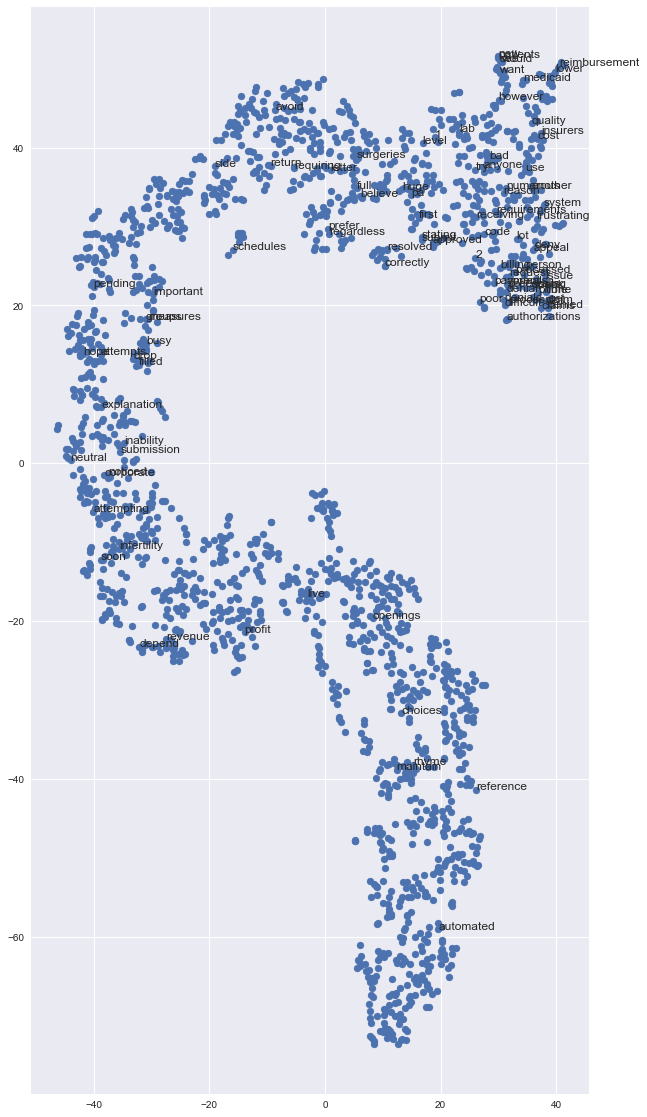

In [80]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df[:100].iterrows():
    ax.annotate(word, pos)
plt.show()

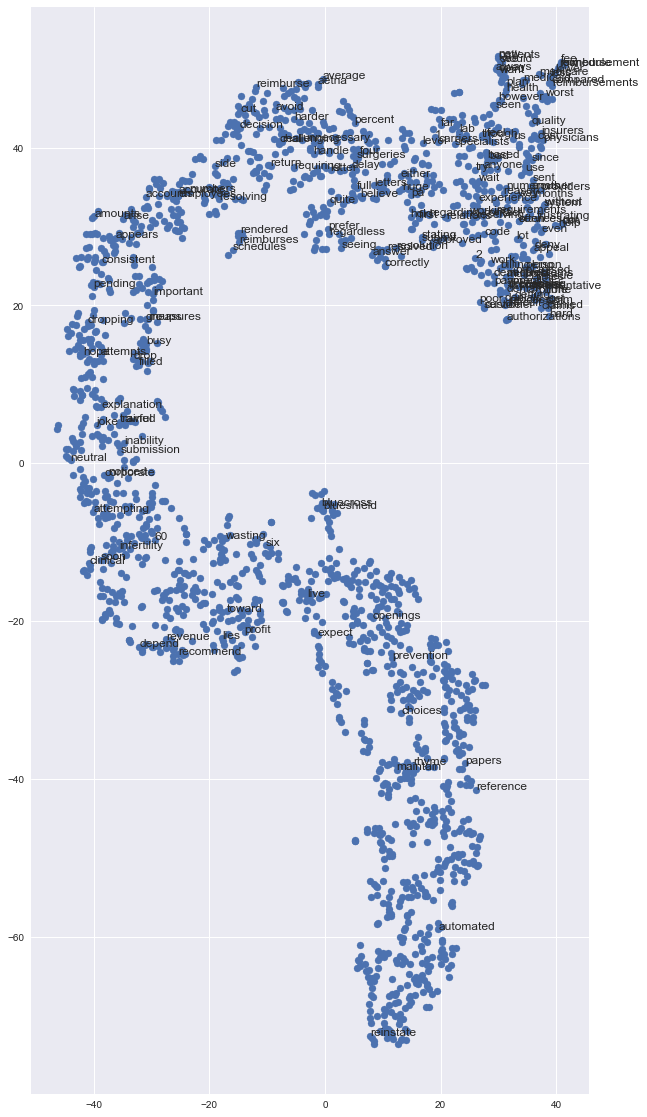

In [84]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df[:200].iterrows():
    ax.annotate(word, pos)
plt.show()

In [87]:
model.wv.most_similar(positive='patients')

[('new', 0.9961847066879272),
 ('accepting', 0.9950830936431885),
 ('see', 0.9950116276741028),
 ('open', 0.9852935075759888),
 ('would', 0.980652928352356),
 ('always', 0.9766941070556641),
 ('seven', 0.975855827331543),
 ('happy', 0.9733238816261292),
 ('want', 0.9723722338676453),
 ('somehow', 0.9662314057350159)]

In [88]:
model.wv.most_similar(positive='notoriously')

[('radiology', 0.9950270652770996),
 ('reporting', 0.9948899745941162),
 ('advanced', 0.9948095083236694),
 ('hassle', 0.9948043823242188),
 ('best', 0.9947937726974487),
 ('burdensome', 0.9947340488433838),
 ('compensated', 0.9946776628494263),
 ('company', 0.9946367740631104),
 ('labor', 0.9945943355560303),
 ('fairly', 0.994528591632843)]

In [95]:
model.wv.most_similar(positive='consuming')

[('require', 0.9976806640625),
 ('obtain', 0.9970245361328125),
 ('auth', 0.9966790676116943),
 ('procedures', 0.9964205026626587),
 ('etc', 0.9958077669143677),
 ('preauthorized', 0.9957283735275269),
 ('approved', 0.9952220916748047),
 ('necessary', 0.994782567024231),
 ('medications', 0.9946675896644592),
 ('obtaining', 0.9938490390777588)]

In [96]:
model.wv.most_similar(positive='medications')

[('cumbersome', 0.9977045059204102),
 ('obtaining', 0.9976418018341064),
 ('stress', 0.997515082359314),
 ('testing', 0.9973906874656677),
 ('needed', 0.9966222047805786),
 ('auth', 0.9963997602462769),
 ('insists', 0.996389627456665),
 ('genetic', 0.9961626529693604),
 ('requires', 0.9960808753967285),
 ('pre', 0.9956849813461304)]

In [99]:
model.wv.most_similar(positive='appeal')

[('incorrectly', 0.999142050743103),
 ('request', 0.9978930950164795),
 ('deny', 0.9978735446929932),
 ('reconsiderations', 0.9976654052734375),
 ('uploaded', 0.9975199103355408),
 ('still', 0.9974367022514343),
 ('processed', 0.9973333477973938),
 ('procedure', 0.9973102807998657),
 ('link', 0.9972417950630188),
 ('approved', 0.9971615076065063)]

In [100]:
model.wv.most_similar(positive='website')

[('people', 0.997481107711792),
 ('providers', 0.9970604181289673),
 ('frustrating', 0.9966515898704529),
 ('disconnected', 0.996353805065155),
 ('showing', 0.9954447746276855),
 ('informed', 0.9954296350479126),
 ('regarding', 0.9952528476715088),
 ('script', 0.9950204491615295),
 ('philippines', 0.9948241710662842),
 ('wasted', 0.9948058724403381)]

In [101]:
model.wv.most_similar(positive='communication')

[('offshore', 0.9981127977371216),
 ('communications', 0.9971761703491211),
 ('appealing', 0.9965313673019409),
 ('barriers', 0.9964375495910645),
 ('unitedhealthcares', 0.99620521068573),
 ('language', 0.9961003661155701),
 ('relations', 0.9960795640945435),
 ('dealing', 0.9960015416145325),
 ('recoupments', 0.995407223701477),
 ('unpaid', 0.9951165318489075)]

In [102]:
model.wv.most_similar(positive='eligibility')

[('disappointed', 0.9993337392807007),
 ('details', 0.9993066191673279),
 ('finally', 0.9992795586585999),
 ('statement', 0.9991888999938965),
 ('offices', 0.9991773366928101),
 ('challenging', 0.9991673231124878),
 ('except', 0.9991627335548401),
 ('physical', 0.9991024732589722),
 ('benefit', 0.9990938901901245),
 ('deductible', 0.9990882277488708)]

In [103]:
model.wv.most_similar(positive='credentialing')

[('departments', 0.9990109801292419),
 ('portal', 0.9989519119262695),
 ('seems', 0.9988359212875366),
 ('lines', 0.9986770153045654),
 ('incorrect', 0.9984269142150879),
 ('response', 0.9984225630760193),
 ('board', 0.9984099864959717),
 ('contacts', 0.9983912110328674),
 ('delays', 0.9983528852462769),
 ('diagnostic', 0.9983306527137756)]

In [104]:
model.wv.most_similar(positive='incorrect')

[('response', 0.9994721412658691),
 ('eob', 0.9994692206382751),
 ('seems', 0.9991167783737183),
 ('simple', 0.9990315437316895),
 ('explanation', 0.9989715814590454),
 ('impossible', 0.9989094138145447),
 ('accurately', 0.9988320469856262),
 ('tried', 0.9987702369689941),
 ('arise', 0.9987519979476929),
 ('gets', 0.9987272620201111)]

In [105]:
model.wv.most_similar(positive='specialist')

[('referred', 0.9984791874885559),
 ('provide', 0.9983972311019897),
 ('due', 0.9982985258102417),
 ('inconvenience', 0.9981581568717957),
 ('blood', 0.9981500506401062),
 ('preference', 0.9981342554092407),
 ('cover', 0.9980798363685608),
 ('serve', 0.9980522990226746),
 ('pick', 0.9979547262191772),
 ('caring', 0.997943103313446)]

In [50]:
parent_df.columns

Index(['id', 'tin', 'npi', 'medicare_flag', 'cands_flag', 'fqhc_flag', 'sat2',
       'sat1_oe', 'comment_length', 'word_count', 'avg_word_length', 'cleaned',
       'bagofwords', 'polarity', 'polarity_compound', 'polarity_positive',
       'polarity_negative', 'polarity_neutral', 'subjectivity', 'rptqtr',
       'region', 'healthplan'],
      dtype='object')

In [51]:
parent_df.shape

(4941, 22)

In [105]:
parent_df['medicare_flag'].value_counts()

1    2484
     2309
0     148
Name: medicare_flag, dtype: int64

In [53]:
parent_df.isnull().sum()

id                      0
tin                     0
npi                    18
medicare_flag        2309
cands_flag              0
fqhc_flag             533
sat2                    0
sat1_oe                 0
comment_length          0
word_count              0
avg_word_length         0
cleaned                 0
bagofwords              3
polarity                0
polarity_compound       0
polarity_positive       0
polarity_negative       0
polarity_neutral        0
subjectivity            0
rptqtr                  0
region                  0
healthplan              0
dtype: int64

In [104]:
parent_df.dtypes

id                    object
tin                   object
npi                   object
medicare_flag         object
cands_flag            object
fqhc_flag             object
sat2                   int32
sat1_oe               object
comment_length         int64
word_count             int64
avg_word_length      float64
cleaned               object
bagofwords            object
polarity              object
polarity_compound    float64
polarity_positive    float64
polarity_negative    float64
polarity_neutral     float64
subjectivity         float64
rptqtr                object
region                object
healthplan            object
dtype: object

In [106]:
parent_df[parent_df['medicare_flag']==''].shape

(2309, 22)

In [103]:
parent_df['medicare_flag'].head(10)

0     
1     
2    0
3    0
4    1
5    0
6    1
7    1
8     
9    1
Name: medicare_flag, dtype: object

In [59]:
#parent_df['medicare_flag'].replace(np.nan,'',inplace=True)

In [60]:
parent_df['medicare_flag'].head(10)

0     
1     
2    0
3    0
4    1
5    0
6    1
7    1
8     
9    1
Name: medicare_flag, dtype: object

In [107]:
parent_df['cands_flag'].isnull().sum()

0

In [108]:
for ind,row in parent_df.iterrows():
    if row['medicare_flag']=='1' and row['cands_flag']=='1':
        parent_df.loc[ind,'LOB'] = 'M&R and C&S'
    elif row['medicare_flag']=='0' and row['cands_flag']=='0':
        parent_df.loc[ind,'LOB'] = 'Others'
    elif row['medicare_flag']=='' and row['cands_flag']=='0':
        parent_df.loc[ind,'LOB'] = 'Others'
    elif row['medicare_flag']=='0' and row['cands_flag']=='1':
        parent_df.loc[ind,'LOB'] = 'C&S'
    elif row['medicare_flag']=='1' and row['cands_flag']=='0':
        parent_df.loc[ind,'LOB'] = 'M&R'
    elif row['medicare_flag']=='' and row['cands_flag']=='1':
        parent_df.loc[ind,'LOB'] = 'C&S'

In [64]:
parent_df.columns

Index(['id', 'tin', 'npi', 'medicare_flag', 'cands_flag', 'fqhc_flag', 'sat2',
       'sat1_oe', 'comment_length', 'word_count', 'avg_word_length', 'cleaned',
       'bagofwords', 'polarity', 'polarity_compound', 'polarity_positive',
       'polarity_negative', 'polarity_neutral', 'subjectivity', 'rptqtr',
       'region', 'healthplan', 'LOB'],
      dtype='object')

In [109]:
parent_df[['medicare_flag','cands_flag','LOB']].head(20)

,medicare_flag,cands_flag,LOB
0,,1,C&S
1,,0,Others
2,0,0,Others
3,0,1,C&S
4,1,1,M&R and C&S
5,0,1,C&S
6,1,1,M&R and C&S
7,1,0,M&R
8,,1,C&S
9,1,0,M&R


In [110]:
parent_df['LOB'].value_counts()

M&R and C&S    1418
Others         1371
C&S            1086
M&R            1066
Name: LOB, dtype: int64

In [68]:
health_plans = pd.Categorical(parent_df['healthplan']).categories
regions = pd.Categorical(parent_df['region']).categories
lobs = pd.Categorical(parent_df['LOB']).categories
print (health_plans)
print (regions)
print (lobs)
print (len(health_plans))
print (len(regions))
print (len(lobs))

Index(['Neighborhood Health Partnership',
       'Nevada - United HealthCare Insurance Company', 'Oxford CT',
       'Oxford NJ', 'Oxford NY',
       'United HealthCare Insurance Company - Connecticut',
       'United HealthCare Insurance Company - Indiana',
       'United HealthCare Insurance Company - Michigan',
       'United Healthcare of Texas, Inc. - Houston',
       'UnitedHealthcare - Central Texas', 'UnitedHealthcare - Cleveland',
       'UnitedHealthcare Dallas', 'UnitedHealthcare of Alabama',
       'UnitedHealthcare of Arizona', 'UnitedHealthcare of Arkansas',
       'UnitedHealthcare of California', 'UnitedHealthcare of Colorado, Inc.',
       'UnitedHealthcare of Florida, Inc. - North Florida',
       'UnitedHealthcare of Florida, Inc. - South Florida',
       'UnitedHealthcare of Georgia', 'UnitedHealthcare of Illinois',
       'UnitedHealthcare of Kentucky', 'UnitedHealthcare of Louisiana',
       'UnitedHealthcare of Mississippi',
       'UnitedHealthcare of New Englan

In [111]:
MR_df = parent_df[parent_df['LOB'] == 'M&R']
CS_df = parent_df[parent_df['LOB'] == 'C&S']
bothlobs_df = parent_df[parent_df['LOB'] == 'M&R and C&S']
others_df = parent_df[parent_df['LOB'] == 'Others']

In [112]:
MR_df.shape

(1066, 23)

In [74]:
CS_df.shape

(1086, 23)

In [75]:
bothlobs_df.shape

(1418, 23)

In [76]:
others_df.shape

(1371, 23)

In [122]:
    word_list = tokenize_only(MR_df['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 5
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(_X_).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(_X_))
    print("Perplexity using tf-idf: ", lda.perplexity(_X_))

Sparsity:  0.0492504223254366 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
patients      easy          patient       reimbursement new           
claims        process       time          difficult     practice      
get           prior         see           authorization like          
work          getting       would         plans         always        
care          low           issues        many          us            
good          one           deal          services      provider      
service       medicare      hard          company       paid          
payment       timely        pay           information   companies     
united        excellent     well          billing       experience    
customer      great         poor          medical       problems      


Log Likelihood using tf-idf:  -67664.12884778599
Perplexity using tf-idf:  1515.8782927859547


In [123]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect, mds = 'mmds')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.211731  0.251698       1        1  23.350804
2     -0.020335 -0.300416       2        1  19.833315
4     -0.288806 -0.077092       3        1  19.384145
3     -0.163009  0.240671       4        1  19.021607
1      0.260419 -0.114861       5        1  18.410130, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
1253  Default  264.000000        patients  264.000000  30.0000  30.0000
1119  Default  113.000000             new  113.000000  29.0000  29.0000
1490  Default   98.000000   reimbursement   98.000000  28.0000  28.0000
555   Default   82.000000            easy   82.000000  27.0000  27.0000
289   Default   92.000000          claims   92.000000  26.0000  26.0000
504   Default   73.000000       difficult   73.000000  25.0000  25.0000
724   Default   83.000000             get   83.000000  24.0000  24.0000
1252  Default   73.000000         patient   73.000000  23.0000  23.0000
2007  Default   78.000000            work   78.000000  22.0000  22.0000
1335  Default   68.000000        practice   68.000000  21.0000  21.0000
1825  Default   60.000000            time   60.000000  20.0000  20.0000
969   Default   57.000000            like   57.000000  19.0000  19.0000
243   Default   63.000000            care   63.000000  18.0000  18.0000
1621  Default   56.000000             see   56.000000  17.0000  17.0000
84    Default   53.000000          always   53.000000  16.0000  16.0000
740   Default   60.000000            good   60.000000  15.0000  15.0000
153   Default   51.000000   authorization   51.000000  14.0000  14.0000
1383  Default   47.000000         process   47.000000  13.0000  13.0000
2013  Default   49.000000           would   49.000000  12.0000  12.0000
1305  Default   44.000000           plans   44.000000  11.0000  11.0000
1374  Default   42.000000           prior   42.000000  10.0000  10.0000
1638  Default   48.000000         service   48.000000   9.0000   9.0000
726   Default   40.000000         getting   40.000000   8.0000   8.0000
1021  Default   41.000000            many   41.000000   7.0000   7.0000
1924  Default   40.000000              us   40.000000   6.0000   6.0000
1261  Default   44.000000         payment   44.000000   5.0000   5.0000
996   Default   37.000000             low   37.000000   4.0000   4.0000
1405  Default   36.000000        provider   36.000000   3.0000   3.0000
1177  Default   35.000000             one   35.000000   2.0000   2.0000
912   Default   37.000000          issues   37.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
555    Topic5   81.746815            easy   82.398879   1.6843  -3.0353
1383   Topic5   47.034748         process   47.686813   1.6785  -3.5880
1374   Topic5   41.827938           prior   42.480003   1.6768  -3.7054
726    Topic5   40.092335         getting   40.744399   1.6761  -3.7477
996    Topic5   36.621128             low   37.273193   1.6746  -3.8383
1177   Topic5   34.885525             one   35.537589   1.6738  -3.8868
1044   Topic5   32.282120        medicare   32.934184   1.6723  -3.9644
1828   Topic5   23.604103          timely   24.256168   1.6650  -4.2775
618    Topic5   19.265094       excellent   19.917159   1.6590  -4.4806
746    Topic5   18.397293           great   19.049358   1.6574  -4.5267
1094   Topic5   14.058284        multiple   14.710349   1.6469  -4.7957
2005   Topic5   14.058284         without   14.710349   1.6469  -4.7957
1382   Topic5   13.190482      procedures   13.842548   1.6440  -4.8594
388    Topic5   13.190482        contract   13.842548   1.6440  -4.8594
727    Topic5   13.190482            give   13.842548   1.6440  -4.8594
998    Topic5   12.322680          lowest   12.974746   1.6407  -4.9275
1273   Topic5   11.454878          people   12.1069

In [116]:
    word_list = tokenize_only(CS_df['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(_X_).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(_X_))
    print("Perplexity using tf-idf: ", lda.perplexity(_X_))

Sparsity:  0.052757948146455964 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
see           claims        reimbursement work          care          
time          good          payment       services      like          
accepting     easy          timely        medicaid      many          
poor          get           call          providers     healthcare    
hard          accept        want          network       claim         
pay           due           health        commercial    customer      
payments      well          reimbursementsdenials       paid          
help          less          benefits      website       getting       
fee           online        takes         lot           referrals     
ease          difficulty    filing        much          working       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------     

In [117]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect, mds = 'mmds')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.315977  0.196603       1        1  11.065632
9      0.091182  0.357342       2        1  10.923469
4     -0.282463 -0.232414       3        1  10.378510
8     -0.213720  0.306983       4        1  10.159341
6      0.123922 -0.362703       5        1  10.011255
7     -0.113624  0.120655       6        1   9.821704
2     -0.059855 -0.248388       7        1   9.525530
3     -0.349868  0.011127       8        1   9.454449
5      0.143621 -0.041984       9        1   9.353750
0      0.344829 -0.107221      10        1   9.306362, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
1181  Default  272.000000       patients  272.000000  30.0000  30.0000
1064  Default  110.000000            new  110.000000  29.0000  29.0000
276   Default   87.000000         claims   87.000000  28.0000  28.0000
1409  Default   74.000000  reimbursement   74.000000  27.0000  27.0000
1871  Default   72.000000           work   72.000000  26.0000  26.0000
82    Default   66.000000         always   66.000000  25.0000  25.0000
690   Default   67.000000           good   67.000000  24.0000  24.0000
505   Default   66.000000           easy   66.000000  23.0000  23.0000
466   Default   60.000000      difficult   60.000000  22.0000  22.0000
676   Default   62.000000            get   62.000000  21.0000  21.0000
235   Default   59.000000           care   59.000000  20.0000  20.0000
1529  Default   55.000000            see   55.000000  19.0000  19.0000
866   Default   57.000000         issues   57.000000  18.0000  18.0000
1180  Default   55.000000        patient   55.000000  17.0000  17.0000
1250  Default   53.000000       practice   53.000000  16.0000  16.0000
923   Default   51.000000           like   51.000000  15.0000  15.0000
1778  Default   48.000000         united   48.000000  14.0000  14.0000
1879  Default   45.000000          would   45.000000  13.0000  13.0000
1543  Default   46.000000        service   46.000000  12.0000  12.0000
976   Default   44.000000           many   44.000000  11.0000  11.0000
1710  Default   40.000000           time   40.000000  10.0000  10.0000
16    Default   40.000000      accepting   40.000000   9.0000   9.0000
1318  Default   42.000000       provider   42.000000   8.0000   8.0000
721   Default   39.000000     healthcare   39.000000   7.0000   7.0000
1285  Default   37.000000          prior   37.000000   6.0000   6.0000
1238  Default   35.000000           poor   35.000000   5.0000   5.0000
1188  Default   33.000000        payment   33.000000   4.0000   4.0000
274   Default   34.000000          claim   34.000000   3.0000   3.0000
709   Default   31.000000           hard   31.000000   2.0000   2.0000
138   Default   32.000000  authorization   32.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
1710  Topic10   39.513208           time   40.247097   2.3561  -2.9897
16    Topic10   39.513208      accepting   40.247097   2.3561  -2.9897
1238  Topic10   34.370491           poor   35.104380   2.3533  -3.1292
709   Topic10   30.942013           hard   31.675902   2.3510  -3.2343
1183  Topic10   30.084894            pay   30.818783   2.3504  -3.2624
1189  Topic10   29.227774       payments   29.961663   2.3497  -3.2913
610   Topic10   18.085221            fee   18.819110   2.3347  -3.7713
729   Topic10   18.085221           help   18.819110   2.3347  -3.7713
1351  Topic10   17.228101          rates   17.961990   2.3328  -3.8198
501   Topic10   17.228101           ease   17.961990   2.3328  -3.8198
680   Topic10   14.656743           give   15.390632   2.3256  -3.9815
1666  Topic10   14.656743           take   15.390632   2.3256  -3.9815
1063  Topic10   11.228265          never   11.962154   2.3112  -4.2479
1093  Topic10   10.371146         number   

In [118]:
    word_list = tokenize_only(bothlobs_df['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(_X_).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(_X_))
    print("Perplexity using tf-idf: ", lda.perplexity(_X_))

Sparsity:  0.04285304766542346 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
like          work          patient       patients      care          
united        get           always        would         provider      
getting       time          prior         service       deal          
paid          issues        medicare      health        coverage      
accepting     referrals     poor          help          better        
healthcare    payments      accept        much          take          
website       optum         insurances    providers     want          
physician     welcome       well          due           denials       
lot           hard          working       provide       excellent     
find          reimbursementsstaff         calls         days          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [119]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect, mds = 'tsne')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      110.602722  -88.272362       1        1  11.160083
9       27.073629 -146.114639       2        1  10.202289
0     -132.582855  -56.296192       3        1  10.110881
6      116.671524   13.148243       4        1  10.055242
8       28.630419  -42.153454       5        1   9.967809
7      -42.987400  102.967216       6        1   9.955886
4     -126.516556   45.123882       7        1   9.796916
1      -44.540749   -0.989493       8        1   9.784993
2       38.309826   60.666824       9        1   9.534616
5      -54.218384 -103.807243      10        1   9.431285, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
1446  Default  411.000000        patients  411.000000  30.0000  30.0000
1303  Default  153.000000             new  153.000000  29.0000  29.0000
325   Default  135.000000          claims  135.000000  28.0000  28.0000
859   Default  108.000000            good  108.000000  27.0000  27.0000
2309  Default  104.000000            work  104.000000  26.0000  26.0000
838   Default  102.000000             get  102.000000  25.0000  25.0000
1445  Default   97.000000         patient   97.000000  24.0000  24.0000
622   Default   97.000000            easy   97.000000  23.0000  23.0000
558   Default   95.000000       difficult   95.000000  22.0000  22.0000
274   Default   88.000000            care   88.000000  21.0000  21.0000
91    Default   86.000000          always   86.000000  20.0000  20.0000
1527  Default   82.000000        practice   82.000000  19.0000  19.0000
1723  Default   81.000000   reimbursement   81.000000  18.0000  18.0000
2103  Default   79.000000            time   79.000000  17.0000  17.0000
1874  Default   79.000000             see   79.000000  16.0000  16.0000
1115  Default   73.000000            like   73.000000  15.0000  15.0000
1060  Default   71.000000          issues   71.000000  14.0000  14.0000
2318  Default   73.000000           would   73.000000  13.0000  13.0000
2192  Default   65.000000          united   65.000000  12.0000  12.0000
324   Default   64.000000           claim   64.000000  11.0000  11.0000
1191  Default   64.000000            many   64.000000  10.0000  10.0000
1572  Default   58.000000           prior   58.000000   9.0000   9.0000
170   Default   55.000000  authorizations   55.000000   8.0000   8.0000
1290  Default   55.000000            need   55.000000   7.0000   7.0000
1612  Default   53.000000        provider   53.000000   6.0000   6.0000
169   Default   53.000000   authorization   53.000000   5.0000   5.0000
840   Default   52.000000         getting   52.000000   4.0000   4.0000
1896  Default   55.000000         service   55.000000   3.0000   3.0000
1585  Default   50.000000         process   50.000000   2.0000   2.0000
1453  Default   49.000000         payment   49.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
1453  Topic10   48.489880         payment   49.247272   2.3456  -3.1975
1359  Topic10   40.569573          office   41.326965   2.3426  -3.3758
1499  Topic10   38.809505           plans   39.566896   2.3418  -3.4201
358   Topic10   29.129129      commercial   29.886521   2.3355  -3.7071
1689  Topic10   26.489027         records   27.246419   2.3329  -3.8021
1058  Topic10   21.208822           issue   21.966214   2.3260  -4.0244
2000  Topic10   21.208822           still   21.966214   2.3260  -4.0244
1711  Topic10   17.688686       regarding   18.446078   2.3192  -4.2059
1210  Topic10   15.928618        medicaid   16.686009   2.3147  -4.3107
1948  Topic10   15.048583       sometimes   15.805975   2.3120  -4.3675
1469  Topic10   14.168549          people   14.925941   2.3091  -4.4278
1263  Topic10   13.288515          months   14.045907   2.3057  -4.4919
1450  Topic10   13.28

In [120]:
    word_list = tokenize_only(others_df['bagofwords'].tolist())
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 10
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(_X_).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(_X_))
    print("Perplexity using tf-idf: ", lda.perplexity(_X_))

Sparsity:  0.044571740368281515 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
time          practice      new           good          united        
see           difficult     like          many          paid          
authorization authorizationsprior         healthcare    company       
payments      physician     plans         coverage      hard          
accept        happy         provider      schedule      medicaid      
website       years         timely        ease          without       
getting       provide       plan          providers     takes         
call          contract      much          help          three         
medical       staff         processing    insurances    excellent     
less          overall       welcome       filing        access        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------     

In [121]:
pyLDAvis.sklearn.prepare(lda, _X_, count_vect, mds = 'mmds')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.348605  0.207964       1        1  11.944207
2      0.094897  0.363017       2        1  10.830916
0     -0.289078 -0.228175       3        1  10.182563
5     -0.216241  0.320985       4        1   9.918103
8      0.145984 -0.356562       5        1   9.798669
1     -0.123335  0.123301       6        1   9.717625
9     -0.073027 -0.295782       7        1   9.606722
3     -0.367207  0.013116       8        1   9.508616
4      0.135807 -0.032196       9        1   9.380652
6      0.343595 -0.115667      10        1   9.111926, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
1374  Default  356.000000        patients  356.000000  30.0000  30.0000
1242  Default  147.000000             new  147.000000  29.0000  29.0000
314   Default  128.000000          claims  128.000000  28.0000  28.0000
1639  Default  105.000000   reimbursement  105.000000  27.0000  27.0000
606   Default  101.000000            easy  101.000000  26.0000  26.0000
825   Default   99.000000            good   99.000000  25.0000  25.0000
2216  Default   98.000000            work   98.000000  24.0000  24.0000
2006  Default   94.000000            time   94.000000  23.0000  23.0000
1464  Default   83.000000        practice   83.000000  22.0000  22.0000
251   Default   82.000000            care   82.000000  21.0000  21.0000
1779  Default   82.000000             see   82.000000  20.0000  20.0000
1373  Default   79.000000         patient   79.000000  19.0000  19.0000
2090  Default   75.000000          united   75.000000  18.0000  18.0000
92    Default   75.000000          always   75.000000  17.0000  17.0000
1077  Default   75.000000            like   75.000000  16.0000  16.0000
1019  Default   71.000000          issues   71.000000  15.0000  15.0000
545   Default   70.000000       difficult   70.000000  14.0000  14.0000
1803  Default   65.000000         service   65.000000  13.0000  13.0000
808   Default   68.000000             get   68.000000  12.0000  12.0000
2228  Default   66.000000           would   66.000000  11.0000  11.0000
1143  Default   57.000000            many   57.000000  10.0000  10.0000
1505  Default   55.000000           prior   55.000000   9.0000   9.0000
1511  Default   47.000000        problems   47.000000   8.0000   8.0000
1375  Default   48.000000             pay   48.000000   7.0000   7.0000
866   Default   45.000000      healthcare   45.000000   6.0000   6.0000
165   Default   45.000000  authorizations   45.000000   5.0000   5.0000
1296  Default   44.000000             one   44.000000   4.0000   4.0000
1432  Default   46.000000           plans   46.000000   3.0000   3.0000
475   Default   43.000000        customer   43.000000   2.0000   2.0000
1516  Default   43.000000         process   43.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
1511  Topic10   46.829933        problems   47.584602   2.3796  -3.1271
731   Topic10   36.043768             fee   36.798437   2.3749  -3.3889
1116  Topic10   30.650686             lot   31.405354   2.3713  -3.5510
865   Topic10   28.852992          health   29.607660   2.3698  -3.6114
206   Topic10   27.954145          better   28.708813   2.3689  -3.6431
214   Topic10   20.763368         billing   21.518036   2.3599  -3.9404
2127  Topic10   19.864521         usually   20.619189   2.3583  -3.9847
1642  Topic10   18.965674  reimbursements   19.720342   2.3566  -4.0310
1784  Topic10   16.269132           seems   17.023801   2.3502  -4.1844
1133  Topic10   15.370285           makes   16.124954   2.3477  -4.2412
2219  Topic10   14.471438         working   15.226107   2.3448  -4.3015
621   Topic10   14.471438     eligibility   15.226107   2.3448  -4.3015
1081  Topic10   12.673744           limit   13.428412   2.3377  -4.43